<a href="https://colab.research.google.com/github/dapooni/FilSign-action-detection/blob/main/FilSign_Training_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import and Install Dependencies

In [ ]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
!pip install opencv-python mediapipe scikit-learn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
grpcio

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 6. Preprocess Data and Create Labels and Features

In [ ]:
# DATA_PATH = r"D:\MP_Data3"
actions = np.array(['afternoon', 'again', 'bye', 'deaf', 'dont_understand',
                    'evening', 'fast', 'fine', 'good', 'hello', 'how', 'how_much',
                    'job', 'later', 'maybe', 'morning', 'name', 'nice_to_meet',
                    'night', 'no', 'no_sign', 'please', 'see you', 'sign_language',
                    'slow', 'sorry', 'take_care', 'thank_you', 'today', 'tomorrow',
                    'understand', 'wait', 'welcome', 'what', 'when', 'where',
                    'who', 'why', 'which', 'yes', 'yesterday', 'you'])
no_sequences = 200
sequence_length = 30

In [ ]:
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X.shape

(6720, 60, 258)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
np.save('X_data.npy', X)
np.save('y_data.npy', y)

NameError: name 'X' is not defined

In [ ]:
X = np.load('/content/drive/MyDrive/Keypoints-dataset/X.npy')
y = np.load('/content/drive/MyDrive/Keypoints-dataset/y.npy')

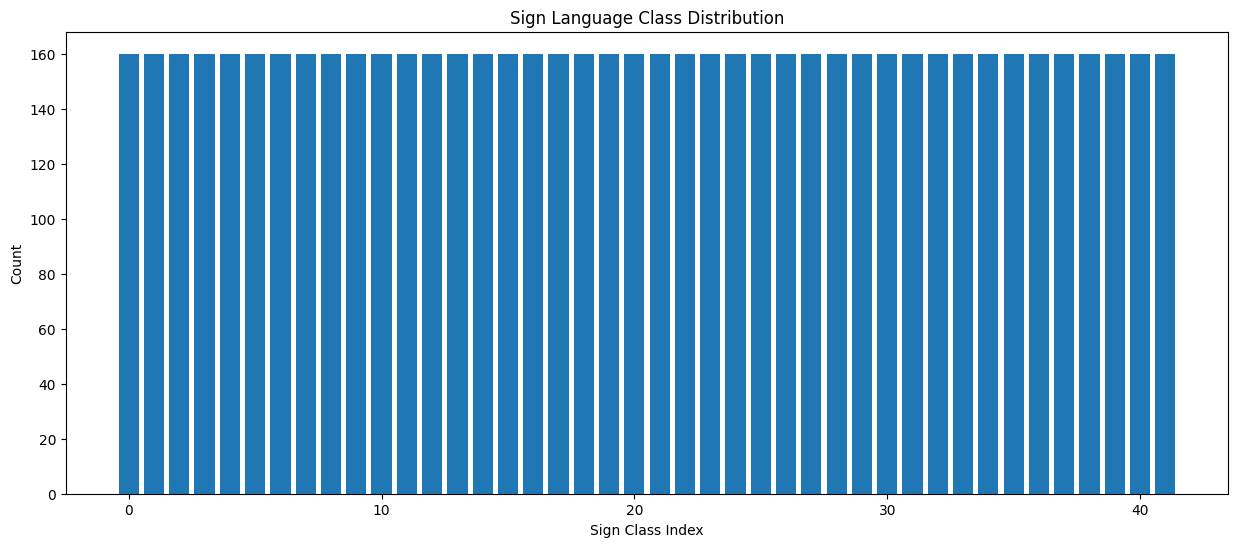

In [ ]:
# If y is one-hot encoded (12060, 201)
class_counts = np.sum(y, axis=0)  # Sum across examples for each class
plt.figure(figsize=(15, 6))
plt.bar(range(len(class_counts)), class_counts)
plt.title('Sign Language Class Distribution')
plt.xlabel('Sign Class Index')
plt.ylabel('Count')
plt.show()

In [ ]:
# Debug the data shapes
print("X shape:", X.shape)
print("y shape:", y.shape)
print("y unique values:", np.unique(y))
print("Type of y:", type(y))
print("y data type:", y.dtype)

X shape: (6720, 60, 258)
y shape: (6720, 42)
y unique values: [0 1]
Type of y: <class 'numpy.ndarray'>
y data type: int32


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check class distribution in original dataset
unique_classes, original_counts = np.unique(y, return_counts=True)
original_distribution = original_counts / len(y)

# Check class distribution in training set
_, train_counts = np.unique(y_train, return_counts=True)
train_distribution = train_counts / len(y_train)

# Check class distribution in test set
_, test_counts = np.unique(y_test, return_counts=True)
test_distribution = test_counts / len(y_test)

# Print distributions
print("Class distribution comparison:")
for i, class_label in enumerate(unique_classes):
    print(f"Class {class_label}: Original={original_distribution[i]:.4f}, Train={train_distribution[i]:.4f}, Test={test_distribution[i]:.4f}")

# Calculate the difference between distributions
train_diff = np.abs(original_distribution - train_distribution)
test_diff = np.abs(original_distribution - test_distribution)

print("\nMaximum distribution difference:")
print(f"Train: {np.max(train_diff):.6f}")
print(f"Test: {np.max(test_diff):.6f}")

# If maximum difference is small (e.g., <0.01), class balance is maintained
if np.max(train_diff) < 0.01 and np.max(test_diff) < 0.01:
    print("\nClass balance is maintained in both splits.")
else:
    print("\nThere may be class imbalance in the splits.")

Class distribution comparison:
Class 0: Original=41.0000, Train=41.0000, Test=41.0000
Class 1: Original=1.0000, Train=1.0000, Test=1.0000

Maximum distribution difference:
Train: 0.000000
Test: 0.000000

Class balance is maintained in both splits.


In [ ]:
import numpy as np

# Define the path where you want to save in Google Drive
save_path = "/content/drive/MyDrive/60 120 22k Ver 4 Training/"  # Change this to your preferred folder

# Save arrays
np.save(save_path + 'X_test.npy', X_test)
np.save(save_path + 'y_test.npy', y_test)
np.save(save_path + 'X_train.npy', X_train)
np.save(save_path + 'y_train.npy', y_train)

print("Files saved to Google Drive successfully!")


Files saved to Google Drive successfully!


In [ ]:
# X_test = np.load('X_test.npy')
# y_test = np.load('y_test.npy')

In [ ]:
X = X[:, :30, :]    # now X_30.shape == (7840, 30, 258)


In [ ]:
X_test = X[:, :40, :]

In [ ]:
print("X train shape:", X_train.shape)  # Expected: (num_samples, num_frames, num_features)
print("y train shape:", y_train.shape)  # Expected: (num_samples,)
print("X test shape:", X_test.shape)  # Expected: (num_samples, num_frames, num_features)
print("y test shape:", y_test.shape)  # Expected: (num_samples,)

X train shape: (5376, 60, 258)
y train shape: (5376, 42)
X test shape: (1344, 60, 258)
y test shape: (1344, 42)


# Class separability analysis

X shape: (23400, 60, 258)
y shape: (23400, 195)
Converted one-hot y to class indices, shape: (23400,)
Number of samples: 23400
Number of timesteps: 60
Number of features per timestep: 258
Number of classes: 195
Extracting features from sequences...
Extracting features (this may take some time for large datasets)...
Extracted 8 different feature representations
Analyzing class separability...
Analyzing separability for last_timestep features...
Analyzing separability for mean features...
Analyzing separability for std features...
Analyzing separability for mean_std features...
Analyzing separability for key_frames features...
Analyzing separability for temporal_diff_mean features...
Analyzing separability for temporal_diff_std features...
Analyzing separability for stats features...

Feature Extraction Methods Comparison:
               Method  Silhouette Score  Davies-Bouldin Index
1                mean         -0.097540              9.643596
3            mean_std         -0.098383    

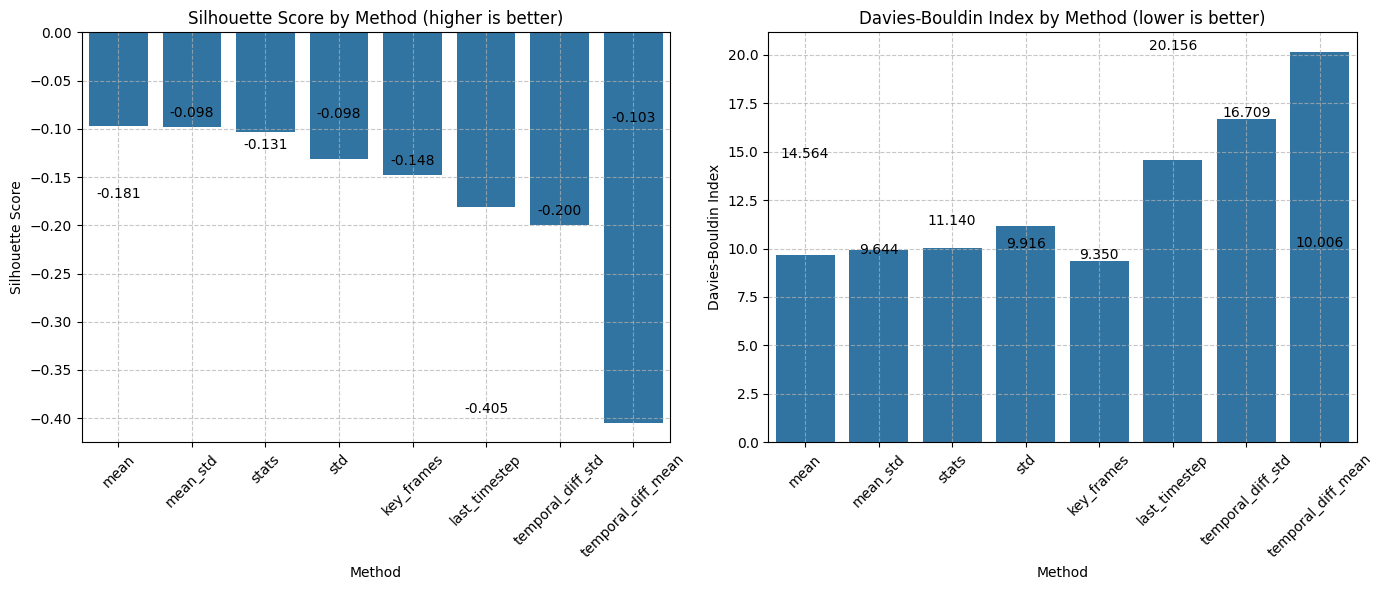

Analyzing separability by timestep...
Analyzing separability at 10 timesteps...
Best timestep: 32 with silhouette score: -0.1345


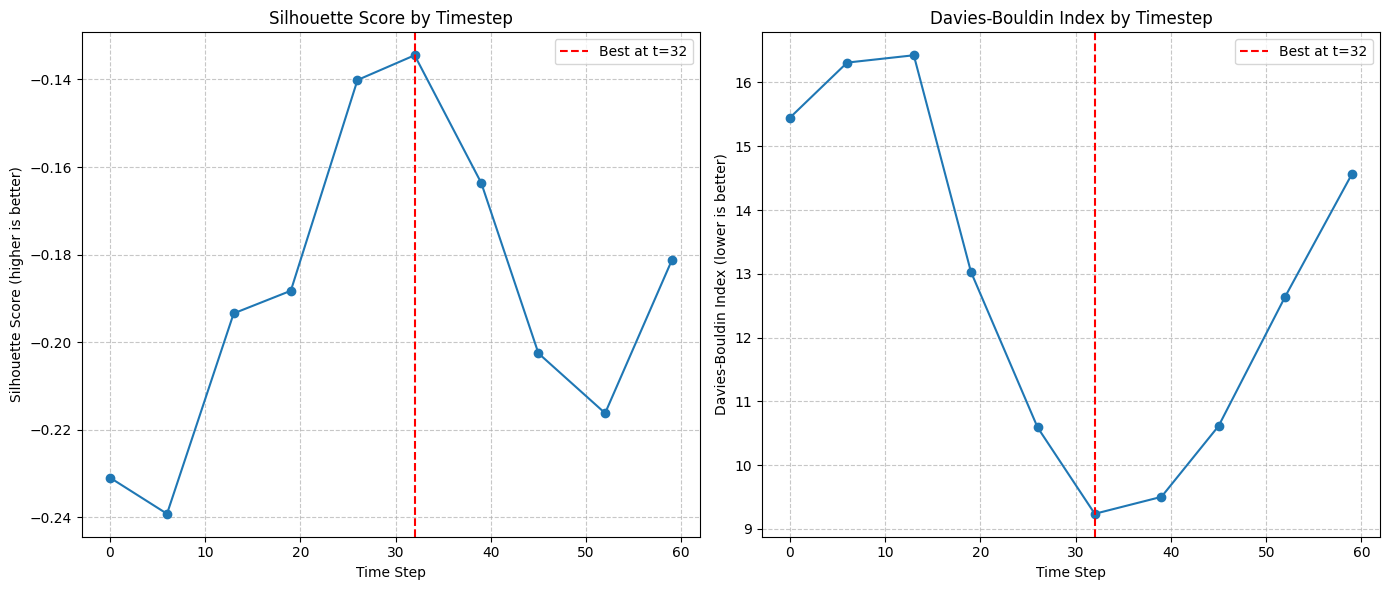

Applying t-SNE for visualization...
Applying PCA for visualization...


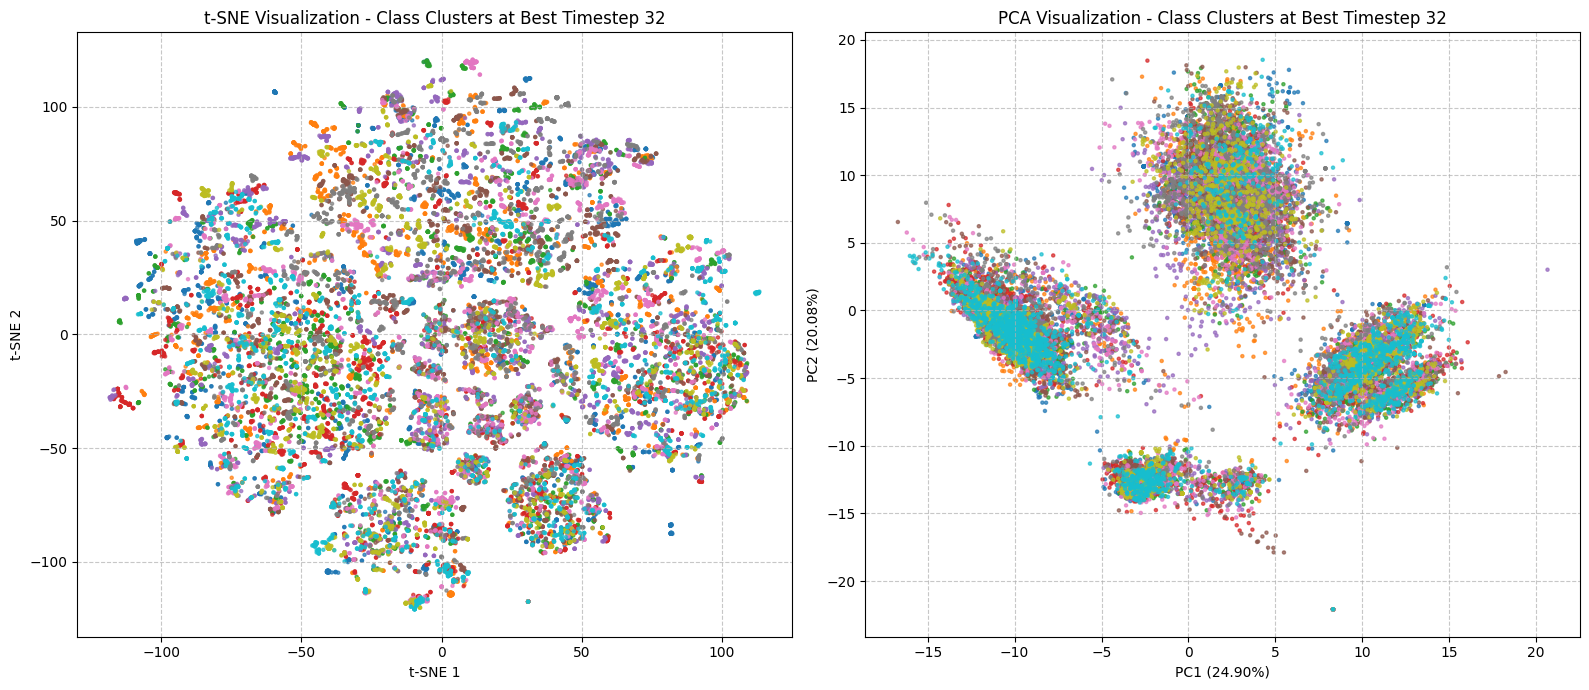

Best feature representation method: mean
Applying t-SNE for visualization...
Applying PCA for visualization...


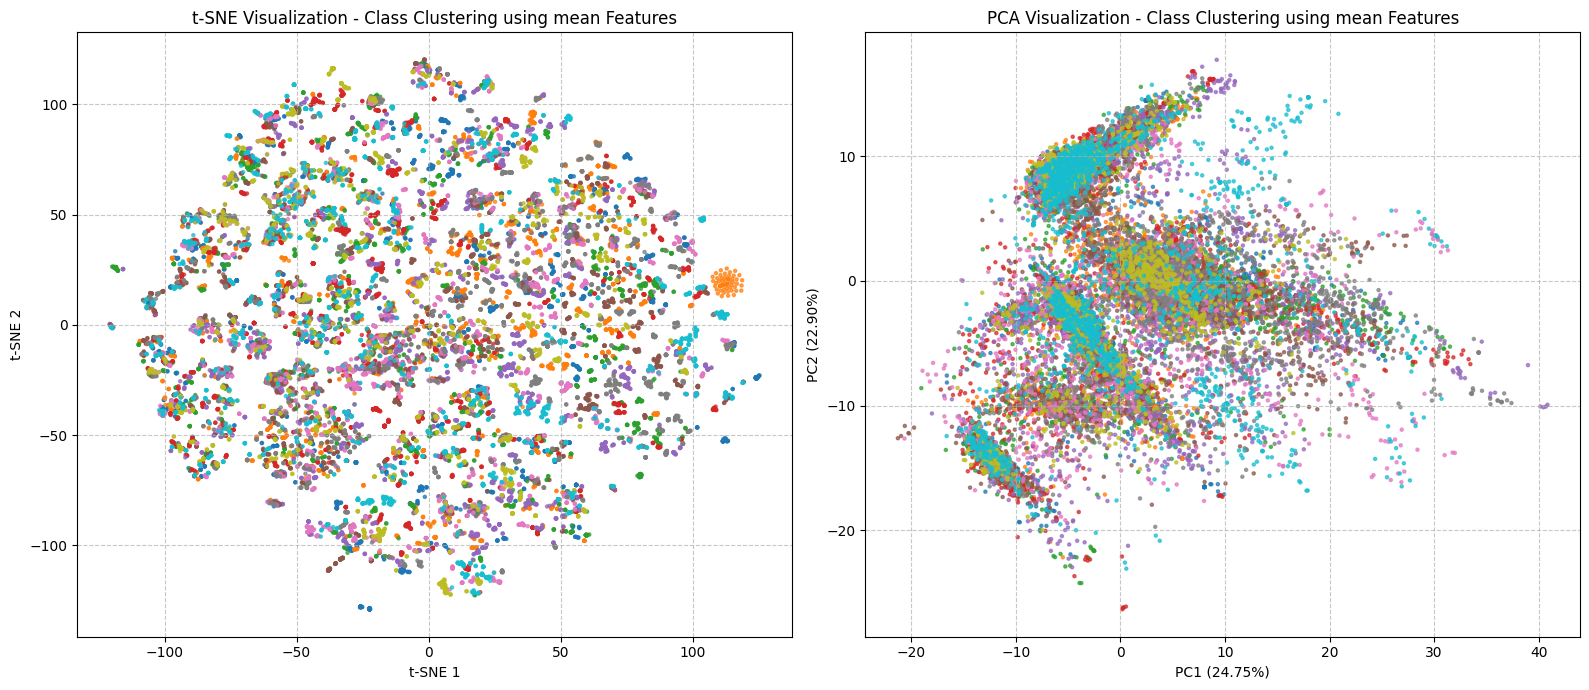

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import pandas as pd

def analyze_sign_language_data(X, y_onehot):
    """
    Analyze sign language data for class separability

    Parameters:
    X : array-like, shape (n_samples, n_timesteps, n_features)
        Sequential feature data
    y_onehot : array-like, shape (n_samples, n_classes)
        One-hot encoded class labels
    """
    print(f"X shape: {X.shape}")
    print(f"y shape: {y_onehot.shape}")

    # Convert one-hot encoded y to class indices if needed
    if len(y_onehot.shape) > 1 and y_onehot.shape[1] > 1:
        y = np.argmax(y_onehot, axis=1)
        print(f"Converted one-hot y to class indices, shape: {y.shape}")
    else:
        y = y_onehot

    # Basic stats
    n_samples, n_timesteps, n_features = X.shape
    n_classes = len(np.unique(y))
    print(f"Number of samples: {n_samples}")
    print(f"Number of timesteps: {n_timesteps}")
    print(f"Number of features per timestep: {n_features}")
    print(f"Number of classes: {n_classes}")

    # Extract different features from sequences
    print("Extracting features from sequences...")
    features = extract_features_from_sequences(X)

    # Analyze class separability for each feature type
    print("Analyzing class separability...")
    separability_results = analyze_feature_separability(features, y)

    # Analyze separability at different timesteps
    print("Analyzing separability by timestep...")
    timestep_analysis = analyze_timestep_separability(X, y)

    # Visualize data using the best feature representation
    best_method = separability_results['best_method']
    print(f"Best feature representation method: {best_method}")
    visualize_best_features(features[best_method], y, method_name=best_method)

    return {
        'features': features,
        'separability_results': separability_results,
        'timestep_analysis': timestep_analysis
    }

def extract_features_from_sequences(X):
    """
    Extract different types of features from sequential data

    Parameters:
    X : array-like, shape (n_samples, n_timesteps, n_features)

    Returns:
    dict with different feature representations
    """
    n_samples, n_timesteps, n_features = X.shape

    print("Extracting features (this may take some time for large datasets)...")

    features = {}

    # 1. Last timestep features
    features['last_timestep'] = X[:, -1, :]

    # 2. Mean over time
    features['mean'] = np.mean(X, axis=1)

    # 3. Standard deviation over time (captures variability)
    features['std'] = np.std(X, axis=1)

    # 4. Mean and std combined
    features['mean_std'] = np.hstack([
        np.mean(X, axis=1),
        np.std(X, axis=1)
    ])

    # 5. Key frame features - use first, middle, and last frames
    mid_idx = n_timesteps // 2
    features['key_frames'] = np.hstack([
        X[:, 0, :],     # First frame
        X[:, mid_idx, :],  # Middle frame
        X[:, -1, :]     # Last frame
    ])

    # 6. Temporal differences (captures motion)
    # Calculate differences between consecutive frames
    diffs = np.diff(X, axis=1)  # shape: (n_samples, n_timesteps-1, n_features)
    features['temporal_diff_mean'] = np.mean(diffs, axis=1)
    features['temporal_diff_std'] = np.std(diffs, axis=1)

    # 7. Statistical features (mean, std, min, max)
    features['stats'] = np.hstack([
        np.mean(X, axis=1),
        np.std(X, axis=1),
        np.min(X, axis=1),
        np.max(X, axis=1)
    ])

    # 8. PCA on flattened sequences (for dimensionality reduction)
    # Don't do flattening for very large feature spaces as it's memory intensive
    if n_timesteps * n_features < 10000:  # Only for reasonably sized data
        X_flat = X.reshape(n_samples, -1)
        pca = PCA(n_components=min(100, X_flat.shape[1]))
        features['pca_flat'] = pca.fit_transform(X_flat)
        print(f"PCA explained variance ratio: {np.sum(pca.explained_variance_ratio_):.4f}")

    print(f"Extracted {len(features)} different feature representations")

    return features

def analyze_feature_separability(features, y):
    """
    Analyze class separability for different feature representations

    Parameters:
    features : dict, different feature representations
    y : array-like, shape (n_samples,), class labels

    Returns:
    dict with separability results
    """
    results = {}
    metrics = {}

    # Calculate metrics for each feature representation
    for name, X in features.items():
        print(f"Analyzing separability for {name} features...")

        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Calculate silhouette score (higher is better)
        try:
            silhouette = silhouette_score(X_scaled, y)
        except Exception as e:
            print(f"Error calculating silhouette score for {name}: {e}")
            silhouette = np.nan

        # Calculate Davies-Bouldin index (lower is better)
        try:
            davies_bouldin = davies_bouldin_score(X_scaled, y)
        except Exception as e:
            print(f"Error calculating Davies-Bouldin score for {name}: {e}")
            davies_bouldin = np.nan

        metrics[name] = {
            'silhouette': silhouette,
            'davies_bouldin': davies_bouldin
        }

    # Create dataframe for visualization
    method_names = list(metrics.keys())
    silhouette_scores = [metrics[m]['silhouette'] for m in method_names]
    db_scores = [metrics[m]['davies_bouldin'] for m in method_names]

    results_df = pd.DataFrame({
        'Method': method_names,
        'Silhouette Score': silhouette_scores,
        'Davies-Bouldin Index': db_scores
    })

    # Sort by silhouette score (higher is better)
    results_df = results_df.sort_values('Silhouette Score', ascending=False)

    print("\nFeature Extraction Methods Comparison:")
    print(results_df)

    # Plot results
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    ax = sns.barplot(x='Method', y='Silhouette Score', data=results_df)
    plt.title('Silhouette Score by Method (higher is better)')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    for i, v in enumerate(silhouette_scores):
        if not np.isnan(v):
            ax.text(i, v + 0.01, f"{v:.3f}", ha='center')

    plt.subplot(1, 2, 2)
    ax = sns.barplot(x='Method', y='Davies-Bouldin Index', data=results_df)
    plt.title('Davies-Bouldin Index by Method (lower is better)')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    for i, v in enumerate(db_scores):
        if not np.isnan(v):
            ax.text(i, v + 0.1, f"{v:.3f}", ha='center')

    plt.tight_layout()
    plt.show()

    # Find best method based on silhouette score
    valid_methods = {m: metrics[m]['silhouette'] for m in metrics
                   if not np.isnan(metrics[m]['silhouette'])}

    if valid_methods:
        best_method = max(valid_methods, key=valid_methods.get)
    else:
        best_method = list(metrics.keys())[0]  # Default to first method

    return {
        'metrics': metrics,
        'results_df': results_df,
        'best_method': best_method
    }

def analyze_timestep_separability(X, y, n_sample_timesteps=10):
    """
    Analyze class separability at different timesteps

    Parameters:
    X : array-like, shape (n_samples, n_timesteps, n_features)
    y : array-like, shape (n_samples,)
    n_sample_timesteps : int, number of timesteps to sample if too many

    Returns:
    dict with timestep analysis results
    """
    n_samples, n_timesteps, n_features = X.shape

    # If too many timesteps, sample a subset
    if n_timesteps > n_sample_timesteps:
        sample_indices = np.linspace(0, n_timesteps-1, n_sample_timesteps, dtype=int)
    else:
        sample_indices = range(n_timesteps)

    # Store results for each timestep
    silhouette_scores = []
    db_scores = []
    timesteps = []

    print(f"Analyzing separability at {len(sample_indices)} timesteps...")

    for t_idx in sample_indices:
        # Get features at this timestep
        X_t = X[:, t_idx, :]

        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_t)

        # Calculate metrics
        try:
            silhouette = silhouette_score(X_scaled, y)
            silhouette_scores.append(silhouette)
        except Exception as e:
            print(f"Error calculating silhouette score for timestep {t_idx}: {e}")
            silhouette_scores.append(np.nan)

        try:
            db_score = davies_bouldin_score(X_scaled, y)
            db_scores.append(db_score)
        except Exception as e:
            print(f"Error calculating Davies-Bouldin score for timestep {t_idx}: {e}")
            db_scores.append(np.nan)

        timesteps.append(t_idx)

    # Find best timestep
    valid_silhouette = [(t, s) for t, s in zip(timesteps, silhouette_scores) if not np.isnan(s)]
    if valid_silhouette:
        best_timestep, best_score = max(valid_silhouette, key=lambda x: x[1])
        print(f"Best timestep: {best_timestep} with silhouette score: {best_score:.4f}")
    else:
        best_timestep = timesteps[0]
        best_score = np.nan
        print("Could not determine best timestep due to calculation errors")

    # Plot metrics over time
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(timesteps, silhouette_scores, marker='o', linestyle='-')
    if not np.isnan(best_score):
        plt.axvline(x=best_timestep, color='r', linestyle='--',
                    label=f'Best at t={best_timestep}')
    plt.title('Silhouette Score by Timestep')
    plt.xlabel('Time Step')
    plt.ylabel('Silhouette Score (higher is better)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2)
    plt.plot(timesteps, db_scores, marker='o', linestyle='-')
    valid_db = [(t, s) for t, s in zip(timesteps, db_scores) if not np.isnan(s)]
    if valid_db:
        best_db_timestep, best_db_score = min(valid_db, key=lambda x: x[1])
        plt.axvline(x=best_db_timestep, color='r', linestyle='--',
                    label=f'Best at t={best_db_timestep}')
    plt.title('Davies-Bouldin Index by Timestep')
    plt.xlabel('Time Step')
    plt.ylabel('Davies-Bouldin Index (lower is better)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Visualize best timestep data
    if not np.isnan(best_score):
        X_best = X[:, best_timestep, :]
        scaler = StandardScaler()
        X_best_scaled = scaler.fit_transform(X_best)

        visualize_data_clustering(X_best_scaled, y,
                               title=f"Class Clusters at Best Timestep {best_timestep}")

    return {
        'timesteps': timesteps,
        'silhouette_scores': silhouette_scores,
        'db_scores': db_scores,
        'best_timestep': best_timestep,
        'best_score': best_score
    }

def visualize_data_clustering(X, y, title="Class Clustering", max_classes=10):
    """
    Visualize data clustering using t-SNE and PCA

    Parameters:
    X : array-like, shape (n_samples, n_features)
        Feature matrix (already scaled)
    y : array-like, shape (n_samples,)
        Class labels
    title : str, plot title
    max_classes : int, maximum number of classes to show in legend
    """
    # Get unique classes
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)

    # If too many classes, don't show legend
    show_legend = n_classes <= max_classes

    # Apply t-SNE for visualization
    print("Applying t-SNE for visualization...")
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Apply PCA for comparison
    print("Applying PCA for visualization...")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create plots
    plt.figure(figsize=(16, 7))

    # t-SNE plot
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10',
               alpha=0.7, s=5)

    if show_legend:
        plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title(f't-SNE Visualization - {title}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.grid(True, linestyle='--', alpha=0.7)

    # PCA plot
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10',
               alpha=0.7, s=5)

    if show_legend:
        plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title(f'PCA Visualization - {title}')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

def visualize_best_features(X, y, method_name="Selected Features", max_classes=10):
    """
    Visualize class clustering using the best features

    Parameters:
    X : array-like, shape (n_samples, n_features)
        Feature matrix
    y : array-like, shape (n_samples,)
        Class labels
    method_name : str, name of the feature method
    max_classes : int, maximum number of classes to show in legend
    """
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Visualize
    visualize_data_clustering(X_scaled, y,
                           title=f"Class Clustering using {method_name} Features",
                           max_classes=max_classes)

    # Calculate confusion pairs (classes that are most similar)
    if len(np.unique(y)) <= 100:  # Only do this for a reasonable number of classes
        print("Calculating most similar class pairs...")
        calculate_class_similarities(X_scaled, y)

def calculate_class_similarities(X, y, top_n=10):
    """
    Calculate which classes are most similar to each other

    Parameters:
    X : array-like, shape (n_samples, n_features)
        Feature matrix (already scaled)
    y : array-like, shape (n_samples,)
        Class labels
    top_n : int, number of most similar pairs to show
    """
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)

    # Calculate class centroids
    centroids = np.zeros((n_classes, X.shape[1]))
    for i, cls in enumerate(unique_classes):
        mask = (y == cls)
        if np.sum(mask) > 0:
            centroids[i] = np.mean(X[mask], axis=0)

    # Calculate distances between all pairs of centroids
    from sklearn.metrics import pairwise_distances
    distances = pairwise_distances(centroids)

    # Find the most similar pairs (excluding self-comparisons)
    np.fill_diagonal(distances, np.inf)  # Ignore self-distances

    # Get the top_n most similar pairs
    similar_pairs = []

    for _ in range(min(top_n, n_classes * (n_classes - 1) // 2)):
        # Find minimum distance
        min_i, min_j = np.unravel_index(np.argmin(distances), distances.shape)

        # Add to similar pairs
        similar_pairs.append((unique_classes[min_i], unique_classes[min_j], distances[min_i, min_j]))

        # Set this distance to infinity to find the next minimum
        distances[min_i, min_j] = np.inf
        distances[min_j, min_i] = np.inf

    # Display the most similar pairs
    print("Most similar class pairs (potential confusion):")
    for i, (cls1, cls2, dist) in enumerate(similar_pairs):
        print(f"{i+1}. Class {cls1} and Class {cls2}: Distance = {dist:.4f}")

    return similar_pairs

# Example usage:
# Replace with actual data loading
# X = np.load('sign_language_data.npy')  # shape (n_samples, n_timesteps, n_features)
# y_onehot = np.load('sign_language_labels.npy')  # shape (n_samples, n_classes)
results = analyze_sign_language_data(X, y)

X shape: (6720, 40, 258)
y shape: (6720, 42)
Converted one-hot y to class indices, shape: (6720,)
Number of samples: 6720
Number of timesteps: 40
Number of features per timestep: 258
Number of classes: 42
Extracting features from sequences...
Extracting features (this may take some time for large datasets)...
Extracted 8 different feature representations
Analyzing class separability...
Analyzing separability for last_timestep features...
Analyzing separability for mean features...
Analyzing separability for std features...
Analyzing separability for mean_std features...
Analyzing separability for key_frames features...
Analyzing separability for temporal_diff_mean features...
Analyzing separability for temporal_diff_std features...
Analyzing separability for stats features...

Feature Extraction Methods Comparison:
               Method  Silhouette Score  Davies-Bouldin Index
7               stats         -0.048408              9.344213
3            mean_std         -0.059896          

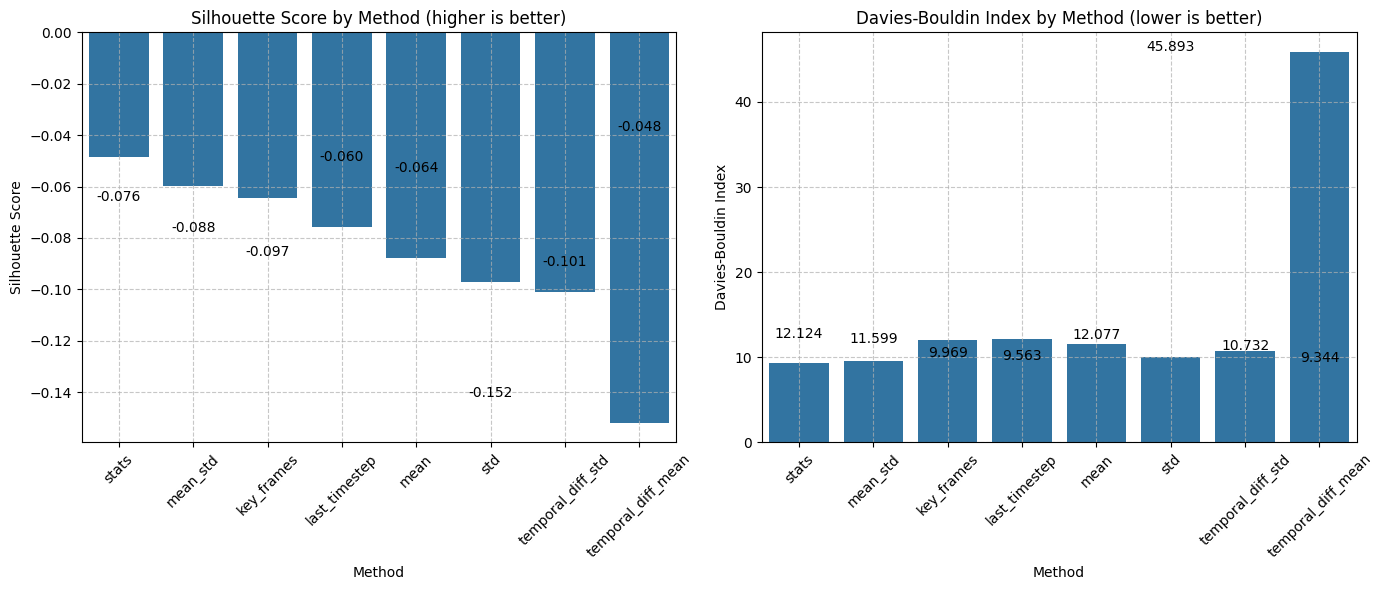

Analyzing separability by timestep...
Analyzing separability at 10 timesteps...
Best timestep: 4 with silhouette score: -0.0682


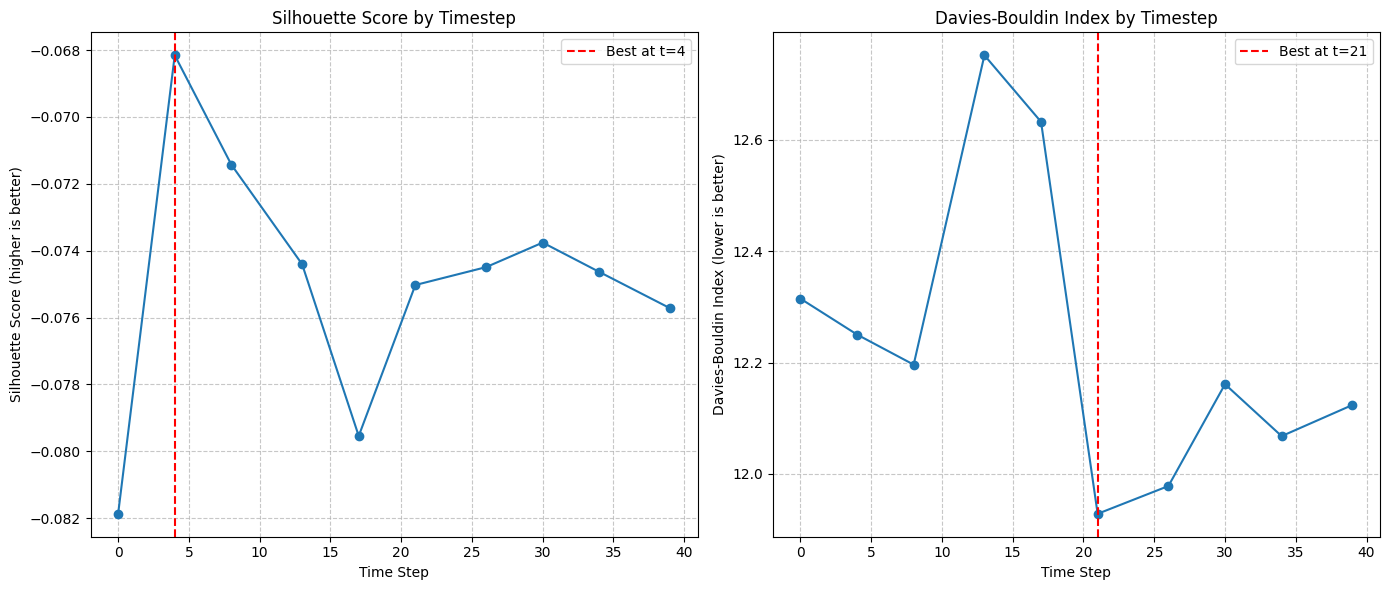

Applying t-SNE for visualization...
Applying PCA for visualization...


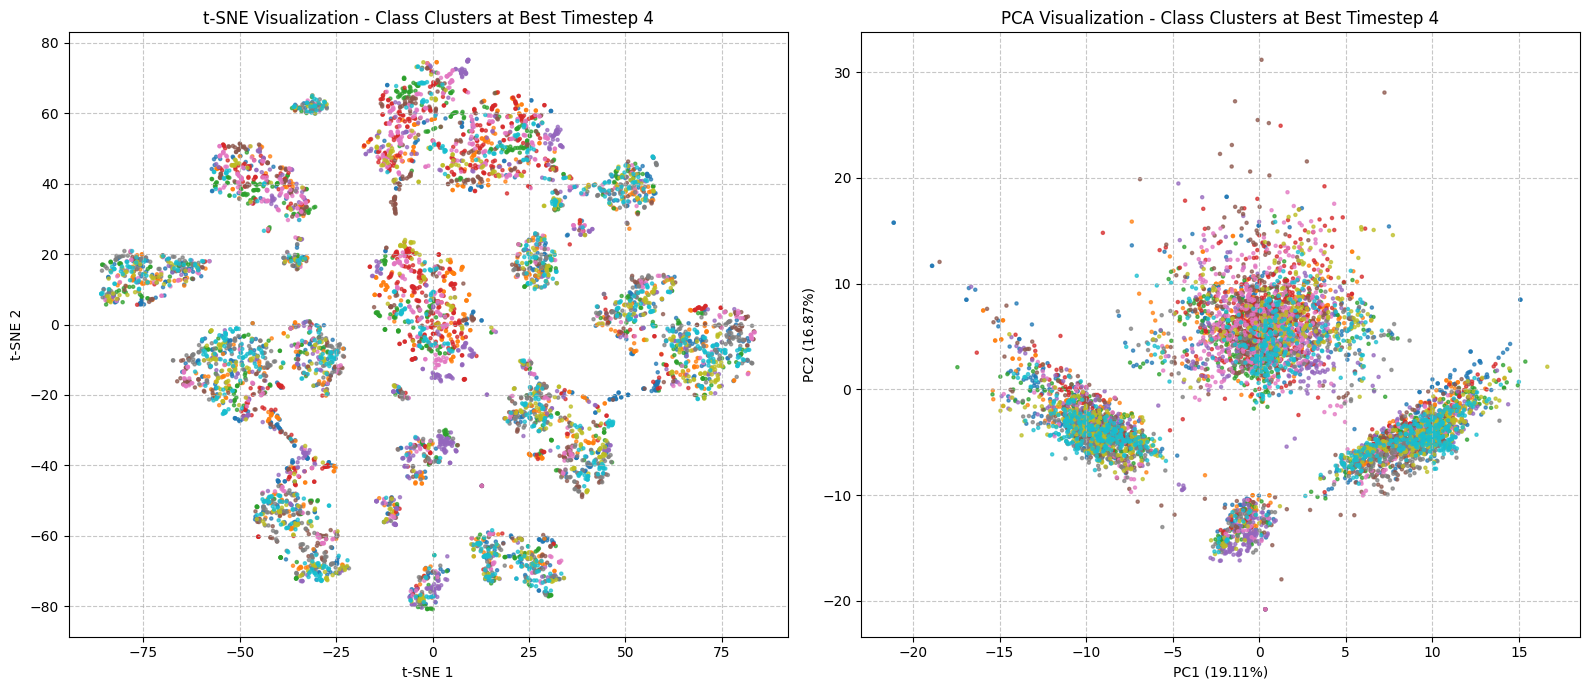

Best feature representation method: stats
Applying t-SNE for visualization...
Applying PCA for visualization...


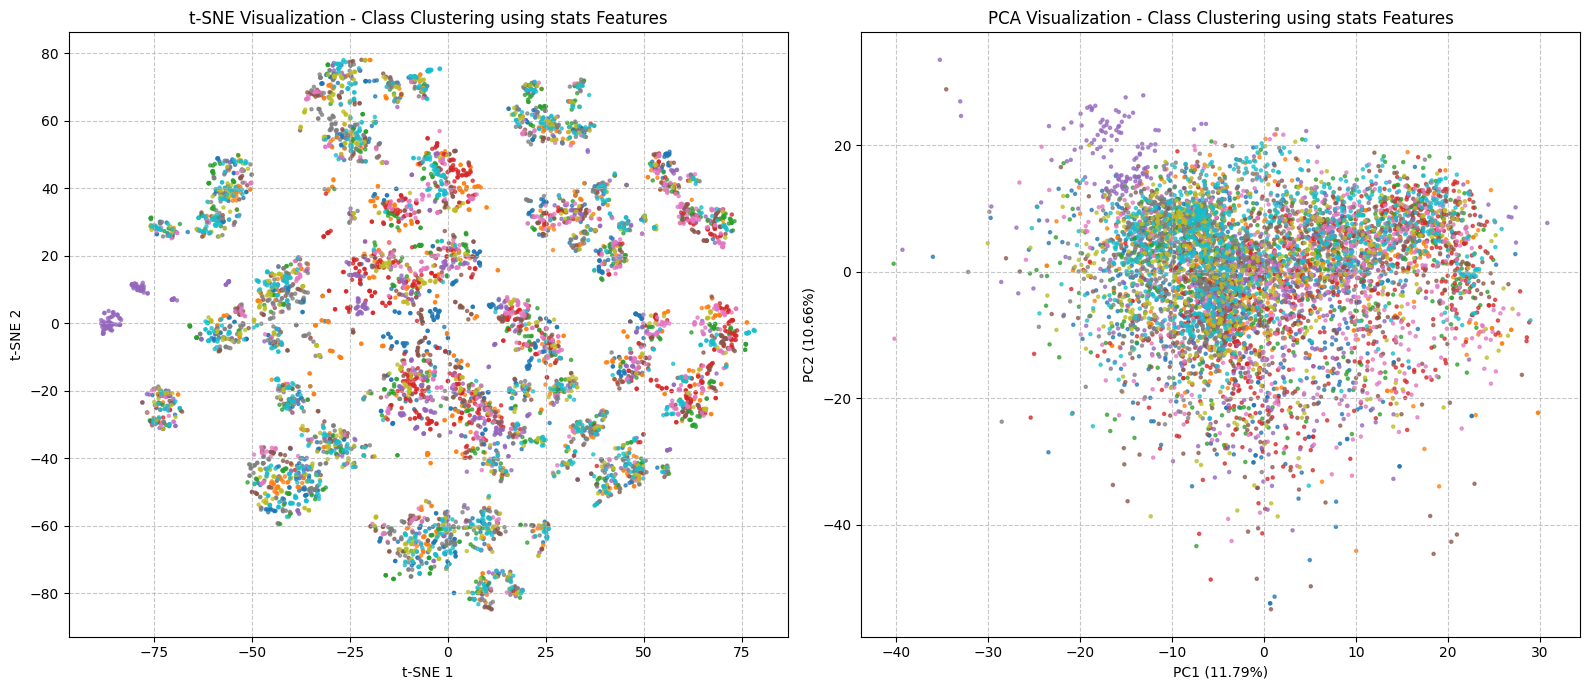

Calculating most similar class pairs...
Most similar class pairs (potential confusion):
1. Class 2 and Class 19: Distance = 3.5765
2. Class 30 and Class 40: Distance = 3.7540
3. Class 6 and Class 33: Distance = 3.8740
4. Class 37 and Class 40: Distance = 4.2131
5. Class 2 and Class 33: Distance = 4.5141
6. Class 21 and Class 25: Distance = 4.5192
7. Class 16 and Class 26: Distance = 4.5288
8. Class 19 and Class 33: Distance = 4.6997
9. Class 2 and Class 31: Distance = 4.7209
10. Class 6 and Class 7: Distance = 4.8736


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import pandas as pd

def analyze_sign_language_data(X, y_onehot):
    """
    Analyze sign language data for class separability

    Parameters:
    X : array-like, shape (n_samples, n_timesteps, n_features)
        Sequential feature data
    y_onehot : array-like, shape (n_samples, n_classes)
        One-hot encoded class labels
    """
    print(f"X shape: {X.shape}")
    print(f"y shape: {y_onehot.shape}")

    # Convert one-hot encoded y to class indices if needed
    if len(y_onehot.shape) > 1 and y_onehot.shape[1] > 1:
        y = np.argmax(y_onehot, axis=1)
        print(f"Converted one-hot y to class indices, shape: {y.shape}")
    else:
        y = y_onehot

    # Basic stats
    n_samples, n_timesteps, n_features = X.shape
    n_classes = len(np.unique(y))
    print(f"Number of samples: {n_samples}")
    print(f"Number of timesteps: {n_timesteps}")
    print(f"Number of features per timestep: {n_features}")
    print(f"Number of classes: {n_classes}")

    # Extract different features from sequences
    print("Extracting features from sequences...")
    features = extract_features_from_sequences(X)

    # Analyze class separability for each feature type
    print("Analyzing class separability...")
    separability_results = analyze_feature_separability(features, y)

    # Analyze separability at different timesteps
    print("Analyzing separability by timestep...")
    timestep_analysis = analyze_timestep_separability(X, y)

    # Visualize data using the best feature representation
    best_method = separability_results['best_method']
    print(f"Best feature representation method: {best_method}")
    visualize_best_features(features[best_method], y, method_name=best_method)

    return {
        'features': features,
        'separability_results': separability_results,
        'timestep_analysis': timestep_analysis
    }

def extract_features_from_sequences(X):
    """
    Extract different types of features from sequential data

    Parameters:
    X : array-like, shape (n_samples, n_timesteps, n_features)

    Returns:
    dict with different feature representations
    """
    n_samples, n_timesteps, n_features = X.shape

    print("Extracting features (this may take some time for large datasets)...")

    features = {}

    # 1. Last timestep features
    features['last_timestep'] = X[:, -1, :]

    # 2. Mean over time
    features['mean'] = np.mean(X, axis=1)

    # 3. Standard deviation over time (captures variability)
    features['std'] = np.std(X, axis=1)

    # 4. Mean and std combined
    features['mean_std'] = np.hstack([
        np.mean(X, axis=1),
        np.std(X, axis=1)
    ])

    # 5. Key frame features - use first, middle, and last frames
    mid_idx = n_timesteps // 2
    features['key_frames'] = np.hstack([
        X[:, 0, :],     # First frame
        X[:, mid_idx, :],  # Middle frame
        X[:, -1, :]     # Last frame
    ])

    # 6. Temporal differences (captures motion)
    # Calculate differences between consecutive frames
    diffs = np.diff(X, axis=1)  # shape: (n_samples, n_timesteps-1, n_features)
    features['temporal_diff_mean'] = np.mean(diffs, axis=1)
    features['temporal_diff_std'] = np.std(diffs, axis=1)

    # 7. Statistical features (mean, std, min, max)
    features['stats'] = np.hstack([
        np.mean(X, axis=1),
        np.std(X, axis=1),
        np.min(X, axis=1),
        np.max(X, axis=1)
    ])

    # 8. PCA on flattened sequences (for dimensionality reduction)
    # Don't do flattening for very large feature spaces as it's memory intensive
    if n_timesteps * n_features < 10000:  # Only for reasonably sized data
        X_flat = X.reshape(n_samples, -1)
        pca = PCA(n_components=min(100, X_flat.shape[1]))
        features['pca_flat'] = pca.fit_transform(X_flat)
        print(f"PCA explained variance ratio: {np.sum(pca.explained_variance_ratio_):.4f}")

    print(f"Extracted {len(features)} different feature representations")

    return features

def analyze_feature_separability(features, y):
    """
    Analyze class separability for different feature representations

    Parameters:
    features : dict, different feature representations
    y : array-like, shape (n_samples,), class labels

    Returns:
    dict with separability results
    """
    results = {}
    metrics = {}

    # Calculate metrics for each feature representation
    for name, X in features.items():
        print(f"Analyzing separability for {name} features...")

        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Calculate silhouette score (higher is better)
        try:
            silhouette = silhouette_score(X_scaled, y)
        except Exception as e:
            print(f"Error calculating silhouette score for {name}: {e}")
            silhouette = np.nan

        # Calculate Davies-Bouldin index (lower is better)
        try:
            davies_bouldin = davies_bouldin_score(X_scaled, y)
        except Exception as e:
            print(f"Error calculating Davies-Bouldin score for {name}: {e}")
            davies_bouldin = np.nan

        metrics[name] = {
            'silhouette': silhouette,
            'davies_bouldin': davies_bouldin
        }

    # Create dataframe for visualization
    method_names = list(metrics.keys())
    silhouette_scores = [metrics[m]['silhouette'] for m in method_names]
    db_scores = [metrics[m]['davies_bouldin'] for m in method_names]

    results_df = pd.DataFrame({
        'Method': method_names,
        'Silhouette Score': silhouette_scores,
        'Davies-Bouldin Index': db_scores
    })

    # Sort by silhouette score (higher is better)
    results_df = results_df.sort_values('Silhouette Score', ascending=False)

    print("\nFeature Extraction Methods Comparison:")
    print(results_df)

    # Plot results
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    ax = sns.barplot(x='Method', y='Silhouette Score', data=results_df)
    plt.title('Silhouette Score by Method (higher is better)')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    for i, v in enumerate(silhouette_scores):
        if not np.isnan(v):
            ax.text(i, v + 0.01, f"{v:.3f}", ha='center')

    plt.subplot(1, 2, 2)
    ax = sns.barplot(x='Method', y='Davies-Bouldin Index', data=results_df)
    plt.title('Davies-Bouldin Index by Method (lower is better)')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    for i, v in enumerate(db_scores):
        if not np.isnan(v):
            ax.text(i, v + 0.1, f"{v:.3f}", ha='center')

    plt.tight_layout()
    plt.show()

    # Find best method based on silhouette score
    valid_methods = {m: metrics[m]['silhouette'] for m in metrics
                   if not np.isnan(metrics[m]['silhouette'])}

    if valid_methods:
        best_method = max(valid_methods, key=valid_methods.get)
    else:
        best_method = list(metrics.keys())[0]  # Default to first method

    return {
        'metrics': metrics,
        'results_df': results_df,
        'best_method': best_method
    }

def analyze_timestep_separability(X, y, n_sample_timesteps=10):
    """
    Analyze class separability at different timesteps

    Parameters:
    X : array-like, shape (n_samples, n_timesteps, n_features)
    y : array-like, shape (n_samples,)
    n_sample_timesteps : int, number of timesteps to sample if too many

    Returns:
    dict with timestep analysis results
    """
    n_samples, n_timesteps, n_features = X.shape

    # If too many timesteps, sample a subset
    if n_timesteps > n_sample_timesteps:
        sample_indices = np.linspace(0, n_timesteps-1, n_sample_timesteps, dtype=int)
    else:
        sample_indices = range(n_timesteps)

    # Store results for each timestep
    silhouette_scores = []
    db_scores = []
    timesteps = []

    print(f"Analyzing separability at {len(sample_indices)} timesteps...")

    for t_idx in sample_indices:
        # Get features at this timestep
        X_t = X[:, t_idx, :]

        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_t)

        # Calculate metrics
        try:
            silhouette = silhouette_score(X_scaled, y)
            silhouette_scores.append(silhouette)
        except Exception as e:
            print(f"Error calculating silhouette score for timestep {t_idx}: {e}")
            silhouette_scores.append(np.nan)

        try:
            db_score = davies_bouldin_score(X_scaled, y)
            db_scores.append(db_score)
        except Exception as e:
            print(f"Error calculating Davies-Bouldin score for timestep {t_idx}: {e}")
            db_scores.append(np.nan)

        timesteps.append(t_idx)

    # Find best timestep
    valid_silhouette = [(t, s) for t, s in zip(timesteps, silhouette_scores) if not np.isnan(s)]
    if valid_silhouette:
        best_timestep, best_score = max(valid_silhouette, key=lambda x: x[1])
        print(f"Best timestep: {best_timestep} with silhouette score: {best_score:.4f}")
    else:
        best_timestep = timesteps[0]
        best_score = np.nan
        print("Could not determine best timestep due to calculation errors")

    # Plot metrics over time
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(timesteps, silhouette_scores, marker='o', linestyle='-')
    if not np.isnan(best_score):
        plt.axvline(x=best_timestep, color='r', linestyle='--',
                    label=f'Best at t={best_timestep}')
    plt.title('Silhouette Score by Timestep')
    plt.xlabel('Time Step')
    plt.ylabel('Silhouette Score (higher is better)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2)
    plt.plot(timesteps, db_scores, marker='o', linestyle='-')
    valid_db = [(t, s) for t, s in zip(timesteps, db_scores) if not np.isnan(s)]
    if valid_db:
        best_db_timestep, best_db_score = min(valid_db, key=lambda x: x[1])
        plt.axvline(x=best_db_timestep, color='r', linestyle='--',
                    label=f'Best at t={best_db_timestep}')
    plt.title('Davies-Bouldin Index by Timestep')
    plt.xlabel('Time Step')
    plt.ylabel('Davies-Bouldin Index (lower is better)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Visualize best timestep data
    if not np.isnan(best_score):
        X_best = X[:, best_timestep, :]
        scaler = StandardScaler()
        X_best_scaled = scaler.fit_transform(X_best)

        visualize_data_clustering(X_best_scaled, y,
                               title=f"Class Clusters at Best Timestep {best_timestep}")

    return {
        'timesteps': timesteps,
        'silhouette_scores': silhouette_scores,
        'db_scores': db_scores,
        'best_timestep': best_timestep,
        'best_score': best_score
    }

def visualize_data_clustering(X, y, title="Class Clustering", max_classes=10):
    """
    Visualize data clustering using t-SNE and PCA

    Parameters:
    X : array-like, shape (n_samples, n_features)
        Feature matrix (already scaled)
    y : array-like, shape (n_samples,)
        Class labels
    title : str, plot title
    max_classes : int, maximum number of classes to show in legend
    """
    # Get unique classes
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)

    # If too many classes, don't show legend
    show_legend = n_classes <= max_classes

    # Apply t-SNE for visualization
    print("Applying t-SNE for visualization...")
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Apply PCA for comparison
    print("Applying PCA for visualization...")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create plots
    plt.figure(figsize=(16, 7))

    # t-SNE plot
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10',
               alpha=0.7, s=5)

    if show_legend:
        plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title(f't-SNE Visualization - {title}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.grid(True, linestyle='--', alpha=0.7)

    # PCA plot
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10',
               alpha=0.7, s=5)

    if show_legend:
        plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title(f'PCA Visualization - {title}')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

def visualize_best_features(X, y, method_name="Selected Features", max_classes=10):
    """
    Visualize class clustering using the best features

    Parameters:
    X : array-like, shape (n_samples, n_features)
        Feature matrix
    y : array-like, shape (n_samples,)
        Class labels
    method_name : str, name of the feature method
    max_classes : int, maximum number of classes to show in legend
    """
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Visualize
    visualize_data_clustering(X_scaled, y,
                           title=f"Class Clustering using {method_name} Features",
                           max_classes=max_classes)

    # Calculate confusion pairs (classes that are most similar)
    if len(np.unique(y)) <= 100:  # Only do this for a reasonable number of classes
        print("Calculating most similar class pairs...")
        calculate_class_similarities(X_scaled, y)

def calculate_class_similarities(X, y, top_n=10):
    """
    Calculate which classes are most similar to each other

    Parameters:
    X : array-like, shape (n_samples, n_features)
        Feature matrix (already scaled)
    y : array-like, shape (n_samples,)
        Class labels
    top_n : int, number of most similar pairs to show
    """
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)

    # Calculate class centroids
    centroids = np.zeros((n_classes, X.shape[1]))
    for i, cls in enumerate(unique_classes):
        mask = (y == cls)
        if np.sum(mask) > 0:
            centroids[i] = np.mean(X[mask], axis=0)

    # Calculate distances between all pairs of centroids
    from sklearn.metrics import pairwise_distances
    distances = pairwise_distances(centroids)

    # Find the most similar pairs (excluding self-comparisons)
    np.fill_diagonal(distances, np.inf)  # Ignore self-distances

    # Get the top_n most similar pairs
    similar_pairs = []

    for _ in range(min(top_n, n_classes * (n_classes - 1) // 2)):
        # Find minimum distance
        min_i, min_j = np.unravel_index(np.argmin(distances), distances.shape)

        # Add to similar pairs
        similar_pairs.append((unique_classes[min_i], unique_classes[min_j], distances[min_i, min_j]))

        # Set this distance to infinity to find the next minimum
        distances[min_i, min_j] = np.inf
        distances[min_j, min_i] = np.inf

    # Display the most similar pairs
    print("Most similar class pairs (potential confusion):")
    for i, (cls1, cls2, dist) in enumerate(similar_pairs):
        print(f"{i+1}. Class {cls1} and Class {cls2}: Distance = {dist:.4f}")

    return similar_pairs

# Example usage:
# Replace with actual data loading
# X = np.load('sign_language_data.npy')  # shape (n_samples, n_timesteps, n_features)
# y_onehot = np.load('sign_language_labels.npy')  # shape (n_samples, n_classes)
results = analyze_sign_language_data(X, y)

# 7. Build and Train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
import numpy as np

In [ ]:
model = Sequential()

# First LSTM layer with L2 regularization
model.add(LSTM(64, return_sequences=True, activation='tanh',
    recurrent_activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2]),
    kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second LSTM layer with L2 regularization
model.add(LSTM(128, return_sequences=True, activation='tanh',
    kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third LSTM layer with L2 regularization
model.add(LSTM(64, return_sequences=False, activation='tanh',
    kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Dense layer with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer (no L2 regularization needed for softmax)
model.add(Dense(y_train.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
metrics=['categorical_accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 120, 64)        │        82,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 120, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 120, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 120, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 120, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 120, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,283 (930.79 KB)

 Trainable params: 237,899 (929.29 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
model = Sequential()

# First LSTM layer with increased regularization
model.add(LSTM(48, return_sequences=True, activation='tanh',
    recurrent_activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2]),
    kernel_regularizer=l2(0.005),
    recurrent_regularizer=l2(0.001)))  # Adding recurrent regularization
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second LSTM layer with increased regularization
model.add(LSTM(96, return_sequences=True, activation='tanh',
    kernel_regularizer=l2(0.005),
    recurrent_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Third LSTM layer (final, non-sequence returning)
model.add(LSTM(48, return_sequences=False, activation='tanh',
    kernel_regularizer=l2(0.005),
    recurrent_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Dense layer with increased regularization
model.add(Dense(48, activation='relu', kernel_regularizer=l2(0.005)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(y_train.shape[1], activation='softmax'))

# Optimizer with adjusted learning rate and clipping
optimizer = Adam(learning_rate=0.0003, clipnorm=0.5)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
    metrics=['categorical_accuracy'])

In [ ]:
# More aggressive callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=4, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_categorical_accuracy', save_best_only=True)

# Try different batch size
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=48,  # An intermediate batch size
    callbacks=[model_checkpoint, reduce_lr, early_stopping]
)

# After training, evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate metrics
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true_classes, y_pred_classes, average='weighted'
)
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Print results
# print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Epoch 1/500
137/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.0457 - loss: 4.6585

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - categorical_accuracy: 0.0460 - loss: 4.6521 - val_categorical_accuracy: 0.0661 - val_loss: 4.0517 - learning_rate: 5.0000e-04
Epoch 2/500
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accuracy: 0.0952 - loss: 3.9273

140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - categorical_accuracy: 0.0954 - loss: 3.9260 - val_categorical_accuracy: 0.1030 - val_loss: 3.6776 - learning_rate: 5.0000e-04
Epoch 3/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.1451 - loss: 3.5491

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.1452 - loss: 3.5486 - val_categorical_accuracy: 0.1863 - val_loss: 3.3028 - learning_rate: 5.0000e-04
Epoch 4/500
137/140 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accuracy: 0.1836 - loss: 3.2879

140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_accuracy: 0.1839 - loss: 3.2864 - val_categorical_accuracy: 0.1929 - val_loss: 3.2135 - learning_rate: 5.0000e-04
Epoch 5/500
137/140 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accuracy: 0.2293 - loss: 3.0725

140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_accuracy: 0.2296 - loss: 3.0714 - val_categorical_accuracy: 0.3048 - val_loss: 2.8312 - learning_rate: 5.0000e-04
Epoch 6/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - categorical_accuracy: 0.2754 - loss: 2.8802 - val_categorical_accuracy: 0.3030 - val_loss: 2.7597 - learning_rate: 5.0000e-04
Epoch 7/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.3061 - loss: 2.7301 - val_categorical_accuracy: 0.2911 - val_loss: 2.7503 - learning_rate: 5.0000e-04
Epoch 8/500
137/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.3509 - loss: 2.5737

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.3512 - loss: 2.5728 - val_categorical_accuracy: 0.3661 - val_loss: 2.4903 - learning_rate: 5.0000e-04
Epoch 9/500
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accuracy: 0.3931 - loss: 2.4361

140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_accuracy: 0.3933 - loss: 2.4357 - val_categorical_accuracy: 0.3780 - val_loss: 2.4059 - learning_rate: 5.0000e-04
Epoch 10/500
138/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.4245 - loss: 2.2881

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.4247 - loss: 2.2876 - val_categorical_accuracy: 0.3839 - val_loss: 2.3799 - learning_rate: 5.0000e-04
Epoch 11/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.4603 - loss: 2.1414

140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - categorical_accuracy: 0.4603 - loss: 2.1414 - val_categorical_accuracy: 0.3946 - val_loss: 2.3926 - learning_rate: 5.0000e-04
Epoch 12/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.4797 - loss: 2.0624 - val_categorical_accuracy: 0.3643 - val_loss: 2.4961 - learning_rate: 5.0000e-04
Epoch 13/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.4952 - loss: 1.9918 - val_categorical_accuracy: 0.3482 - val_loss: 2.5441 - learning_rate: 5.0000e-04
Epoch 14/500
138/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.5421 - loss: 1.8687

140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - categorical_accuracy: 0.5419 - loss: 1.8688 - val_categorical_accuracy: 0.4774 - val_loss: 2.0526 - learning_rate: 5.0000e-04
Epoch 15/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.5607 - loss: 1.7894

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.5607 - loss: 1.7894 - val_categorical_accuracy: 0.4911 - val_loss: 2.0225 - learning_rate: 5.0000e-04
Epoch 16/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - categorical_accuracy: 0.5879 - loss: 1.6853 - val_categorical_accuracy: 0.4256 - val_loss: 2.2925 - learning_rate: 5.0000e-04
Epoch 17/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - categorical_accuracy: 0.5964 - loss: 1.6528 - val_categorical_accuracy: 0.4839 - val_loss: 2.0685 - learning_rate: 5.0000e-04
Epoch 18/500
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.6253 - loss: 1.5654

140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - categorical_accuracy: 0.6252 - loss: 1.5655 - val_categorical_accuracy: 0.5220 - val_loss: 1.9182 - learning_rate: 5.0000e-04
Epoch 19/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - categorical_accuracy: 0.6337 - loss: 1.5104 - val_categorical_accuracy: 0.4262 - val_loss: 2.3570 - learning_rate: 5.0000e-04
Epoch 20/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - categorical_accuracy: 0.6503 - loss: 1.4543 - val_categorical_accuracy: 0.3833 - val_loss: 2.6399 - learning_rate: 5.0000e-04
Epoch 21/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - categorical_accuracy: 0.6707 - loss: 1.4009 - val_categorical_accuracy: 0.4119 - val_loss: 2.4575 - learning_rate: 5.0000e-04
Epoch 22/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.6710 - loss: 1.3625 - val_categorical_accuracy: 0.5071 - val_loss: 1.9692 - learning_rate: 5.0000e-04
Epoch 23/500
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.7048 - loss: 1.23

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.7050 - loss: 1.2394 - val_categorical_accuracy: 0.6506 - val_loss: 1.4683 - learning_rate: 2.0000e-04
Epoch 24/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.7397 - loss: 1.1529

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.7397 - loss: 1.1529 - val_categorical_accuracy: 0.6536 - val_loss: 1.4980 - learning_rate: 2.0000e-04
Epoch 25/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.7506 - loss: 1.1092 - val_categorical_accuracy: 0.6286 - val_loss: 1.5626 - learning_rate: 2.0000e-04
Epoch 26/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - categorical_accuracy: 0.7605 - loss: 1.0952 - val_categorical_accuracy: 0.6375 - val_loss: 1.4837 - learning_rate: 2.0000e-04
Epoch 27/500
138/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.7660 - loss: 1.0512

140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - categorical_accuracy: 0.7660 - loss: 1.0511 - val_categorical_accuracy: 0.6958 - val_loss: 1.2986 - learning_rate: 2.0000e-04
Epoch 28/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.7713 - loss: 1.0306 - val_categorical_accuracy: 0.6768 - val_loss: 1.3656 - learning_rate: 2.0000e-04
Epoch 29/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.7822 - loss: 0.9856 - val_categorical_accuracy: 0.6774 - val_loss: 1.3541 - learning_rate: 2.0000e-04
Epoch 30/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.7979 - loss: 0.9703 - val_categorical_accuracy: 0.6595 - val_loss: 1.4171 - learning_rate: 2.0000e-04
Epoch 31/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - categorical_accuracy: 0.8010 - loss: 0.9475 - val_categorical_accuracy: 0.6607 - val_loss: 1.4213 - learning_rate: 2.0000e-04
Epoch 32/500
137/140 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.8141 - loss: 0.90

140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - categorical_accuracy: 0.8143 - loss: 0.9076 - val_categorical_accuracy: 0.7411 - val_loss: 1.1573 - learning_rate: 8.0000e-05
Epoch 33/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.8320 - loss: 0.8663 - val_categorical_accuracy: 0.7327 - val_loss: 1.1758 - learning_rate: 8.0000e-05
Epoch 34/500
137/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.8208 - loss: 0.8721

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.8210 - loss: 0.8717 - val_categorical_accuracy: 0.7423 - val_loss: 1.1454 - learning_rate: 8.0000e-05
Epoch 35/500
138/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.8300 - loss: 0.8592

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.8301 - loss: 0.8589 - val_categorical_accuracy: 0.7524 - val_loss: 1.1503 - learning_rate: 8.0000e-05
Epoch 36/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_accuracy: 0.8366 - loss: 0.8308 - val_categorical_accuracy: 0.7494 - val_loss: 1.1290 - learning_rate: 8.0000e-05
Epoch 37/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - categorical_accuracy: 0.8419 - loss: 0.8211 - val_categorical_accuracy: 0.7464 - val_loss: 1.1505 - learning_rate: 8.0000e-05
Epoch 38/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.8440 - loss: 0.7964 - val_categorical_accuracy: 0.7524 - val_loss: 1.1444 - learning_rate: 8.0000e-05
Epoch 39/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.8570 - loss: 0.7897

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.8570 - loss: 0.7897 - val_categorical_accuracy: 0.7655 - val_loss: 1.1100 - learning_rate: 8.0000e-05
Epoch 40/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.8520 - loss: 0.7848 - val_categorical_accuracy: 0.7625 - val_loss: 1.1192 - learning_rate: 8.0000e-05
Epoch 41/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - categorical_accuracy: 0.8561 - loss: 0.7789 - val_categorical_accuracy: 0.7565 - val_loss: 1.1262 - learning_rate: 8.0000e-05
Epoch 42/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - categorical_accuracy: 0.8550 - loss: 0.7711 - val_categorical_accuracy: 0.7500 - val_loss: 1.1289 - learning_rate: 8.0000e-05
Epoch 43/500
138/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.8620 - loss: 0.7565

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.8619 - loss: 0.7564 - val_categorical_accuracy: 0.7774 - val_loss: 1.0859 - learning_rate: 8.0000e-05
Epoch 44/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.8598 - loss: 0.7643 - val_categorical_accuracy: 0.7685 - val_loss: 1.1099 - learning_rate: 8.0000e-05
Epoch 45/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - categorical_accuracy: 0.8601 - loss: 0.7539 - val_categorical_accuracy: 0.7637 - val_loss: 1.1056 - learning_rate: 8.0000e-05
Epoch 46/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.8726 - loss: 0.7196 - val_categorical_accuracy: 0.7613 - val_loss: 1.0914 - learning_rate: 8.0000e-05
Epoch 47/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - categorical_accuracy: 0.8717 - loss: 0.7190 - val_categorical_accuracy: 0.7637 - val_loss: 1.1056 - learning_rate: 8.0000e-05
Epoch 48/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.8772 - loss: 0.70

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.8772 - loss: 0.7074 - val_categorical_accuracy: 0.7917 - val_loss: 1.0462 - learning_rate: 3.2000e-05
Epoch 49/500
138/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.8730 - loss: 0.7007

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.8731 - loss: 0.7004 - val_categorical_accuracy: 0.7929 - val_loss: 1.0232 - learning_rate: 3.2000e-05
Epoch 50/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.8819 - loss: 0.6852 - val_categorical_accuracy: 0.7911 - val_loss: 1.0368 - learning_rate: 3.2000e-05
Epoch 51/500
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.8849 - loss: 0.6832

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.8849 - loss: 0.6830 - val_categorical_accuracy: 0.7935 - val_loss: 1.0232 - learning_rate: 3.2000e-05
Epoch 52/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - categorical_accuracy: 0.8851 - loss: 0.6813 - val_categorical_accuracy: 0.7929 - val_loss: 1.0347 - learning_rate: 3.2000e-05
Epoch 53/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.8871 - loss: 0.6775

140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - categorical_accuracy: 0.8871 - loss: 0.6774 - val_categorical_accuracy: 0.7964 - val_loss: 1.0109 - learning_rate: 3.2000e-05
Epoch 54/500
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.8858 - loss: 0.6680

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.8858 - loss: 0.6679 - val_categorical_accuracy: 0.8012 - val_loss: 1.0132 - learning_rate: 3.2000e-05
Epoch 55/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.8781 - loss: 0.6765 - val_categorical_accuracy: 0.7958 - val_loss: 1.0169 - learning_rate: 3.2000e-05
Epoch 56/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.8796 - loss: 0.6866 - val_categorical_accuracy: 0.7935 - val_loss: 1.0371 - learning_rate: 3.2000e-05
Epoch 57/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - categorical_accuracy: 0.8862 - loss: 0.6573 - val_categorical_accuracy: 0.7940 - val_loss: 1.0213 - learning_rate: 3.2000e-05
Epoch 58/500
136/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.8919 - loss: 0.6526

140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - categorical_accuracy: 0.8919 - loss: 0.6524 - val_categorical_accuracy: 0.8071 - val_loss: 0.9994 - learning_rate: 1.2800e-05
Epoch 59/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.8910 - loss: 0.6540 - val_categorical_accuracy: 0.8018 - val_loss: 0.9951 - learning_rate: 1.2800e-05
Epoch 60/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.8989 - loss: 0.6392 - val_categorical_accuracy: 0.8042 - val_loss: 0.9938 - learning_rate: 1.2800e-05
Epoch 61/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - categorical_accuracy: 0.8929 - loss: 0.6371 - val_categorical_accuracy: 0.8071 - val_loss: 0.9915 - learning_rate: 1.2800e-05
Epoch 62/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - categorical_accuracy: 0.8955 - loss: 0.6405 - val_categorical_accuracy: 0.8042 - val_loss: 1.0026 - learning_rate: 1.2800e-05
Epoch 63/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.9002 - loss: 0.62

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.8982 - loss: 0.6271 - val_categorical_accuracy: 0.8083 - val_loss: 0.9939 - learning_rate: 1.2800e-05
Epoch 65/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - categorical_accuracy: 0.8980 - loss: 0.6367 - val_categorical_accuracy: 0.8048 - val_loss: 0.9990 - learning_rate: 1.2800e-05
Epoch 66/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - categorical_accuracy: 0.8978 - loss: 0.6390 - val_categorical_accuracy: 0.8065 - val_loss: 0.9882 - learning_rate: 1.0000e-05
Epoch 67/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.9057 - loss: 0.6311

140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - categorical_accuracy: 0.9057 - loss: 0.6311 - val_categorical_accuracy: 0.8089 - val_loss: 0.9865 - learning_rate: 1.0000e-05
Epoch 68/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.9033 - loss: 0.6279 - val_categorical_accuracy: 0.8048 - val_loss: 0.9860 - learning_rate: 1.0000e-05
Epoch 69/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.9005 - loss: 0.6269 - val_categorical_accuracy: 0.8089 - val_loss: 0.9883 - learning_rate: 1.0000e-05
Epoch 70/500
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.9007 - loss: 0.6213

140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - categorical_accuracy: 0.9007 - loss: 0.6212 - val_categorical_accuracy: 0.8113 - val_loss: 0.9872 - learning_rate: 1.0000e-05
Epoch 71/500
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accuracy: 0.9000 - loss: 0.6227

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - categorical_accuracy: 0.9000 - loss: 0.6227 - val_categorical_accuracy: 0.8137 - val_loss: 0.9817 - learning_rate: 1.0000e-05
Epoch 72/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.8975 - loss: 0.6231 - val_categorical_accuracy: 0.8060 - val_loss: 0.9921 - learning_rate: 1.0000e-05
Epoch 73/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.9003 - loss: 0.6267 - val_categorical_accuracy: 0.8107 - val_loss: 0.9849 - learning_rate: 1.0000e-05
Epoch 74/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.8967 - loss: 0.6330 - val_categorical_accuracy: 0.8095 - val_loss: 0.9845 - learning_rate: 1.0000e-05
Epoch 75/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - categorical_accuracy: 0.9048 - loss: 0.6225 - val_categorical_accuracy: 0.8119 - val_loss: 0.9880 - learning_rate: 1.0000e-05
Epoch 76/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - categorical_accuracy: 0.9062 - loss: 0.61

140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - categorical_accuracy: 0.9141 - loss: 0.5962 - val_categorical_accuracy: 0.8155 - val_loss: 0.9782 - learning_rate: 1.0000e-05
Epoch 87/500
138/140 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.9090 - loss: 0.6001

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.9089 - loss: 0.6001 - val_categorical_accuracy: 0.8167 - val_loss: 0.9823 - learning_rate: 1.0000e-05
Epoch 88/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.9031 - loss: 0.6079 - val_categorical_accuracy: 0.8089 - val_loss: 0.9789 - learning_rate: 1.0000e-05
Epoch 89/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - categorical_accuracy: 0.9075 - loss: 0.6032 - val_categorical_accuracy: 0.8149 - val_loss: 0.9808 - learning_rate: 1.0000e-05
Epoch 90/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - categorical_accuracy: 0.9060 - loss: 0.5991 - val_categorical_accuracy: 0.8101 - val_loss: 0.9795 - learning_rate: 1.0000e-05
Epoch 91/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.9068 - loss: 0.5979 - val_categorical_accuracy: 0.8131 - val_loss: 0.9738 - learning_rate: 1.0000e-05
Epoch 92/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.9058 - loss: 0.60

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.9049 - loss: 0.6058 - val_categorical_accuracy: 0.8173 - val_loss: 0.9803 - learning_rate: 1.0000e-05
Epoch 94/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - categorical_accuracy: 0.9020 - loss: 0.5971 - val_categorical_accuracy: 0.8137 - val_loss: 0.9842 - learning_rate: 1.0000e-05
Epoch 95/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - categorical_accuracy: 0.9100 - loss: 0.5940 - val_categorical_accuracy: 0.8125 - val_loss: 0.9807 - learning_rate: 1.0000e-05
Epoch 96/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - categorical_accuracy: 0.9120 - loss: 0.5883 - val_categorical_accuracy: 0.8143 - val_loss: 0.9736 - learning_rate: 1.0000e-05
Epoch 97/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.9068 - loss: 0.5945 - val_categorical_accuracy: 0.8131 - val_loss: 0.9805 - learning_rate: 1.0000e-05
Epoch 98/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.9090 - loss: 0.59

140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - categorical_accuracy: 0.9145 - loss: 0.5878 - val_categorical_accuracy: 0.8179 - val_loss: 0.9695 - learning_rate: 1.0000e-05
Epoch 105/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - categorical_accuracy: 0.9098 - loss: 0.5870 - val_categorical_accuracy: 0.8113 - val_loss: 0.9811 - learning_rate: 1.0000e-05
Epoch 106/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - categorical_accuracy: 0.9134 - loss: 0.5913 - val_categorical_accuracy: 0.8125 - val_loss: 0.9797 - learning_rate: 1.0000e-05
Epoch 107/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.9108 - loss: 0.5908 - val_categorical_accuracy: 0.8107 - val_loss: 0.9746 - learning_rate: 1.0000e-05
Epoch 108/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - categorical_accuracy: 0.9176 - loss: 0.5799 - val_categorical_accuracy: 0.8155 - val_loss: 0.9760 - learning_rate: 1.0000e-05
Epoch 109/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - categorical_accuracy: 0.9022 - loss:

140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - categorical_accuracy: 0.9123 - loss: 0.5742 - val_categorical_accuracy: 0.8185 - val_loss: 0.9757 - learning_rate: 1.0000e-05
Epoch 119/500
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - categorical_accuracy: 0.9154 - loss: 0.5789 - val_categorical_accuracy: 0.8131 - val_loss: 0.9772 - learning_rate: 1.0000e-05
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


NameError: name 'precision_recall_fscore_support' is not defined

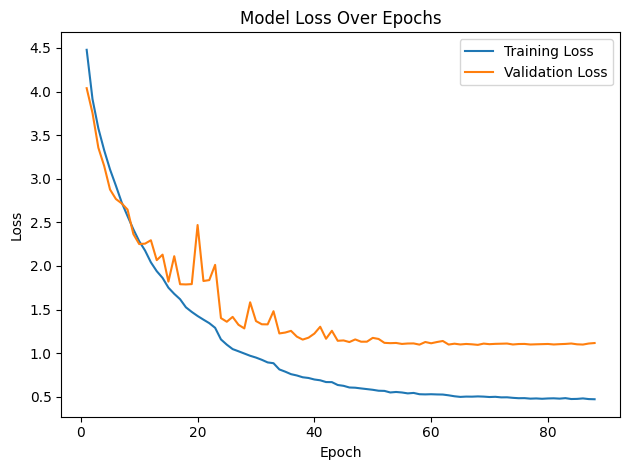

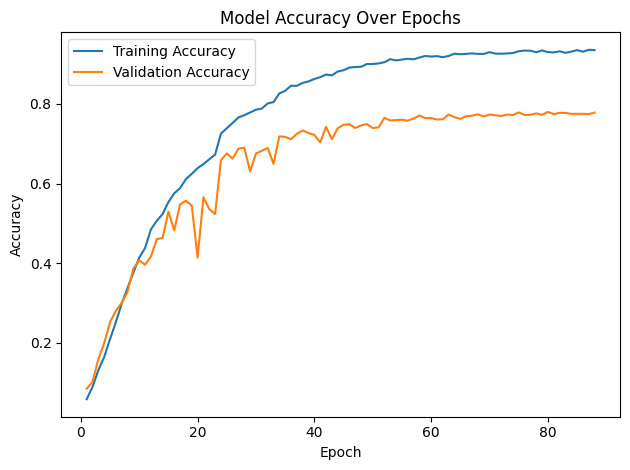

In [ ]:
import matplotlib.pyplot as plt

# Extract values
loss        = history.history['loss']
val_loss    = history.history['val_loss']
acc         = history.history.get('categorical_accuracy', history.history.get('accuracy'))
val_acc     = history.history.get('val_categorical_accuracy', history.history.get('val_accuracy'))

epochs = range(1, len(loss) + 1)

# 1) Plot Loss
plt.figure()
plt.plot(epochs, loss,      label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()  # :contentReference[oaicite:1]{index=1}

# 2) Plot Accuracy
plt.figure()
plt.plot(epochs, acc,       label='Training Accuracy')
plt.plot(epochs, val_acc,   label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()  # :contentReference[oaicite:2]{index=2}

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [ ]:
# Add essential callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True),
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001),
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max')

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=64,  # Try different batch sizes (16, 32, 64)
    callbacks=[model_checkpoint, reduce_lr, early_stopping]
)

# After training, evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true_classes, y_pred_classes, average='weighted'
)
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Epoch 1/500
65/84 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - categorical_accuracy: 0.0247 - loss: 32.1613

KeyboardInterrupt: 

In [ ]:
model.save('augmented_model.h5')

In [ ]:
model.save('new_model.h5')

In [ ]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
load.model('/content/drive/MyDrive/test/test.h5')

NameError: name 'load' is not defined

# 8. Make Predictions

In [ ]:
res = model.predict(X_test_normalized)

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


In [ ]:
actions[np.argmax(res[5])]

'who'

In [ ]:
actions[np.argmax(y_test[5])]

'who'

# 9. Save Weights

In [ ]:
# After training
model.save("test_model.keras")

NameError: name 'model' is not defined

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 0],
        [0, 4]],

       [[5, 0],
        [0, 4]],

       [[8, 0],
        [0, 1]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame

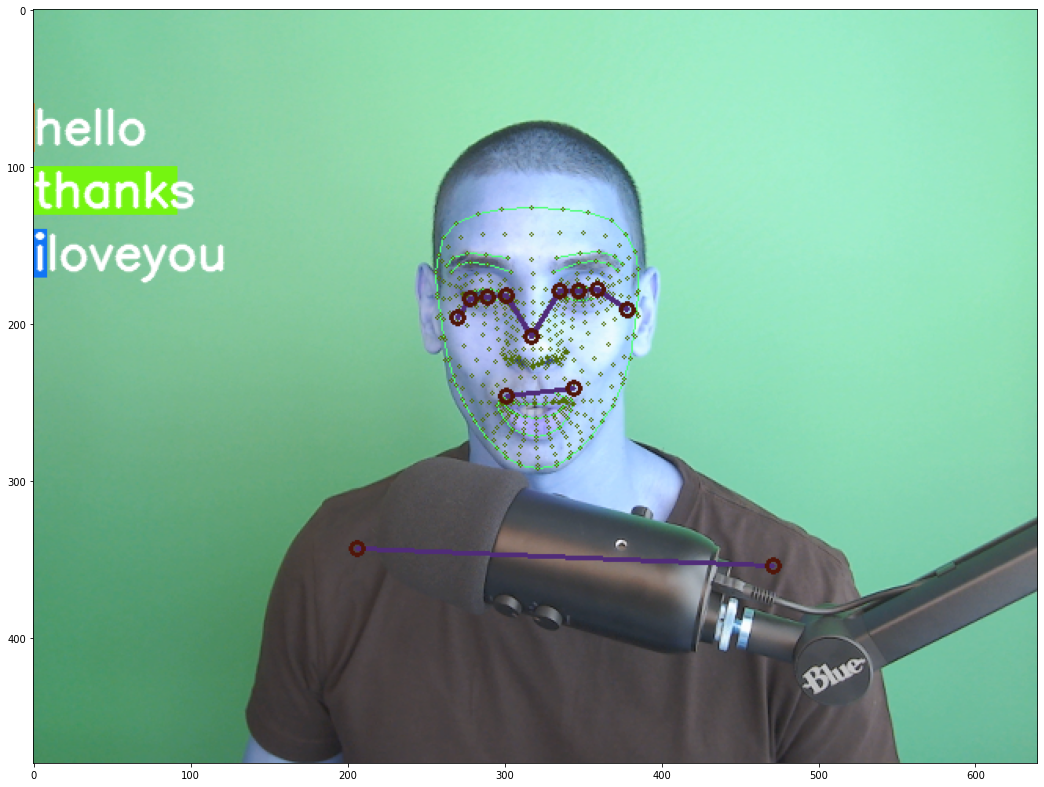

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))


        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

Converting tensoflowjs

In [ ]:
pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 114.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found 

In [ ]:
!tensorflowjs_converter --input_format=keras /content/LSTMdeepattention_model.h5 /content/model

2025-04-05 13:40:01.873603: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-05 13:40:01.873653: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-05 13:40:01.875129: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-05 13:40:01.882979: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-05 13:40:02.917786: W tensorflow/compiler/tf2